In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

(284807, 31)

In [8]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [12]:
# 0 is for legit tarnsactions and 1 is for fradulent transactions
df['Class'].value_counts()
#the data is unbalanced

Class
0    284315
1       492
Name: count, dtype: int64

In [14]:
#sepaarte the data
legit = df[df.Class == 0]
fraud = df[df.Class == 1]

In [23]:
#describe
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [25]:
#balance the data set
n_legit = legit.sample(n = 492)

In [27]:
#concatenate the legit and fraud df
new_df =pd.concat([n_legit, fraud], axis =0)
new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202198,134215.0,-0.045289,0.659394,0.381638,-0.610663,0.486701,-1.070585,1.070925,-0.353160,0.394698,...,-0.310367,-0.635264,0.121605,-0.061745,-0.576404,0.109617,-0.050258,-0.138089,1.98,0
178642,123714.0,-1.327734,-1.719864,1.268301,0.229782,2.257200,-1.945932,-0.881109,-0.129298,0.577349,...,0.195903,0.259011,0.617330,-0.049093,-1.457549,-0.763425,0.088588,0.112646,6.52,0
25562,33665.0,1.083332,0.406788,0.734621,2.328083,-0.083221,0.237864,-0.127473,0.251828,-0.820523,...,-0.178986,-0.671965,0.169745,-0.060544,0.102766,-0.250675,-0.003364,0.013962,10.98,0
129272,79024.0,-2.171225,1.810960,0.311890,0.768117,-0.285882,-0.891105,0.532752,0.085864,0.061473,...,0.036817,0.503781,0.083121,0.411846,0.031423,-0.341888,0.090261,0.500640,28.34,0
7710,10722.0,-0.409550,1.170096,1.395344,0.224261,0.283211,-0.443322,0.602569,-0.034923,0.838856,...,-0.374612,-0.739474,0.057078,-0.032224,-0.241073,0.061594,0.232140,0.090240,16.99,0


In [28]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [48]:
#model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
#split df
X = new_df.drop(['Class'], axis = 1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

#scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
pred = model.predict(X_test_scaled)

In [49]:
score = accuracy_score(y_test, pred)
print(f'score = {score * 100}')

print(classification_report(y_test, pred))

score = 92.89340101522842
              precision    recall  f1-score   support

           0       0.88      0.98      0.93        91
           1       0.98      0.89      0.93       106

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



Text(50.722222222222214, 0.5, 'labels')

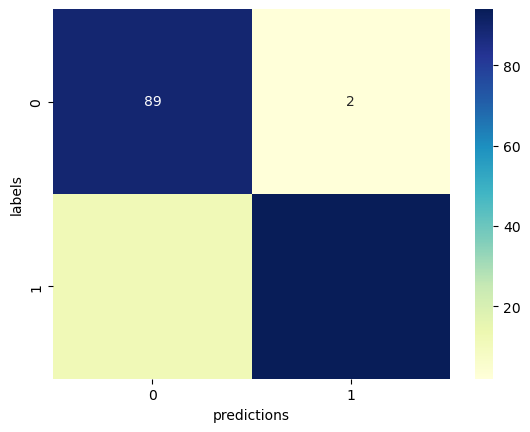

In [54]:
conf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(conf_matrix, annot = True, cmap ='YlGnBu')
plt.xlabel('predictions')
plt.ylabel('labels')

In [46]:
import joblib
joblib.dump(model, 'fraud_model.joblib')

['fraud_model.joblib']